In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/kaggle/input/bakery/Bakery.csv')

print("--- Initial Data Inspection ---")
print("Shape:", df.shape)

print("\nColumns:", df.columns.tolist())
print("\nData Info:")
df.info()

print("\n" + "="*50 + "\n")
print("--- Data Cleaning and Preparation ---")

df_cleaned = df.copy()
df_cleaned.rename(columns={'TransactionNo': 'Transaction'}, inplace=True)
df_cleaned['DateTime'] = pd.to_datetime(df_cleaned['DateTime'])

df_cleaned['Items'] = df_cleaned['Items'].str.strip()
df_cleaned['Items'] = df_cleaned['Items'].str.lower()

rows_before = df_cleaned.shape[0]
df_cleaned = df_cleaned[df_cleaned['Items'] != 'none']
rows_after = df_cleaned.shape[0]

print("Shape before cleaning 'none' items:", rows_before)
print("Shape after cleaning 'none' items:", rows_after)
print(f"Removed {rows_before - rows_after} rows containing 'none' items.")

print("\nFinal cleaned data info:")
df_cleaned.info()
print("\nSample of cleaned items:")
print(df_cleaned['Items'].unique()[:10])


--- Initial Data Inspection ---
Shape: (20507, 5)

Columns: ['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType']

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


--- Data Cleaning and Preparation ---
Shape before cleaning 'none' items: 20507
Shape after cleaning 'none' items: 20507
Removed 0 rows containing 'none' items.

Final cleaned data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Transa

In [ ]:
print("--- Verifying Item Name Consistency ---")
unique_items = sorted(df_cleaned['Items'].unique())
print(f"Total unique items found: {len(unique_items)}")
print("\nList of all unique items (alphabetically sorted):")
for item in unique_items:
    print(f"- {item}")


--- Verifying Item Name Consistency ---
Total unique items found: 94

List of all unique items (alphabetically sorted):
- adjustment
- afternoon with the baker
- alfajores
- argentina night
- art tray
- bacon
- baguette
- bakewell
- bare popcorn
- basket
- bowl nic pitt
- bread
- bread pudding
- brioche and salami
- brownie
- cake
- caramel bites
- cherry me dried fruit
- chicken sand
- chicken stew
- chimichurri oil
- chocolates
- christmas common
- coffee
- coffee granules
- coke
- cookies
- crepes
- crisps
- drinking chocolate spoons
- duck egg
- dulce de leche
- eggs
- ella's kitchen pouches
- empanadas
- extra salami or feta
- fairy doors
- farm house
- focaccia
- frittata
- fudge
- gift voucher
- gingerbread syrup
- granola
- hack the stack
- half slice monster
- hearty & seasonal
- honey
- hot chocolate
- jam
- jammie dodgers
- juice
- keeping it local
- kids biscuit
- lemon and coconut
- medialuna
- mighty protein
- mineral water
- mortimer
- muesli
- muffin
- my-5 fruit shoot


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/kaggle/input/bakery/Bakery.csv')
df_cleaned = df.copy()
df_cleaned.rename(columns={'TransactionNo': 'Transaction'}, inplace=True)
df_cleaned['DateTime'] = pd.to_datetime(df_cleaned['DateTime'])

df_cleaned['Items'] = df_cleaned['Items'].str.strip()
df_cleaned['Items'] = df_cleaned['Items'].str.lower()

items_to_remove = [
    'adjustment', 'art tray', 'basket', 'bowl nic pitt', 'christmas common',
    'fairy doors', 'gift voucher', 'hack the stack', 'keeping it local',
    'mortimer', 'my-5 fruit shoot', 'nomad bag', 'olum & polenta',
    'pick and mix bowls', 'pintxos', 'postcard', 'siblings', 'the bart',
    'the nomad', 'tshirt', "valentine's card"
]

rows_before = df_cleaned.shape[0]
df_cleaned = df_cleaned[~df_cleaned['Items'].isin(items_to_remove)]
rows_after = df_cleaned.shape[0]

print("--- Enhanced Data Cleaning ---")
print("Shape before removing non-food items:", rows_before)
print("Shape after removing non-food items:", rows_after)
print(f"Removed {rows_before - rows_after} rows containing non-food/irrelevant items.")

print("\nFinal cleaned data info:")
df_cleaned.info()

final_unique_items = sorted(df_cleaned['Items'].unique())
print(f"\nTotal unique items after final cleaning: {len(final_unique_items)}")


--- Enhanced Data Cleaning ---
Shape before removing non-food items: 20507
Shape after removing non-food items: 20226
Removed 281 rows containing non-food/irrelevant items.

Final cleaned data info:
<class 'pandas.core.frame.DataFrame'>
Index: 20226 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Transaction  20226 non-null  int64         
 1   Items        20226 non-null  object        
 2   DateTime     20226 non-null  datetime64[ns]
 3   Daypart      20226 non-null  object        
 4   DayType      20226 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 948.1+ KB

Total unique items after final cleaning: 73


--- Pareto Analysis (80/20 Rule) ---
Top 20 items and their cumulative contribution:
             item  count  cumulative_percentage
0          coffee   5471              27.049342
1           bread   3325              43.488579
2             tea   1435              50.583407
3            cake   1025              55.651142
4          pastry    856              59.883319
5        sandwich    771              63.695244
6       medialuna    616              66.740829
7   hot chocolate    590              69.657866
8         cookies    540              72.327697
9         brownie    379              74.201523
10     farm house    374              76.050628
11         muffin    370              77.879956
12      alfajores    369              79.704341
13          juice    369              81.528725
14           soup    342              83.219618
15          scone    327              84.836349
16          toast    318              86.408583
17   scandinavian    277              87.778107
18 

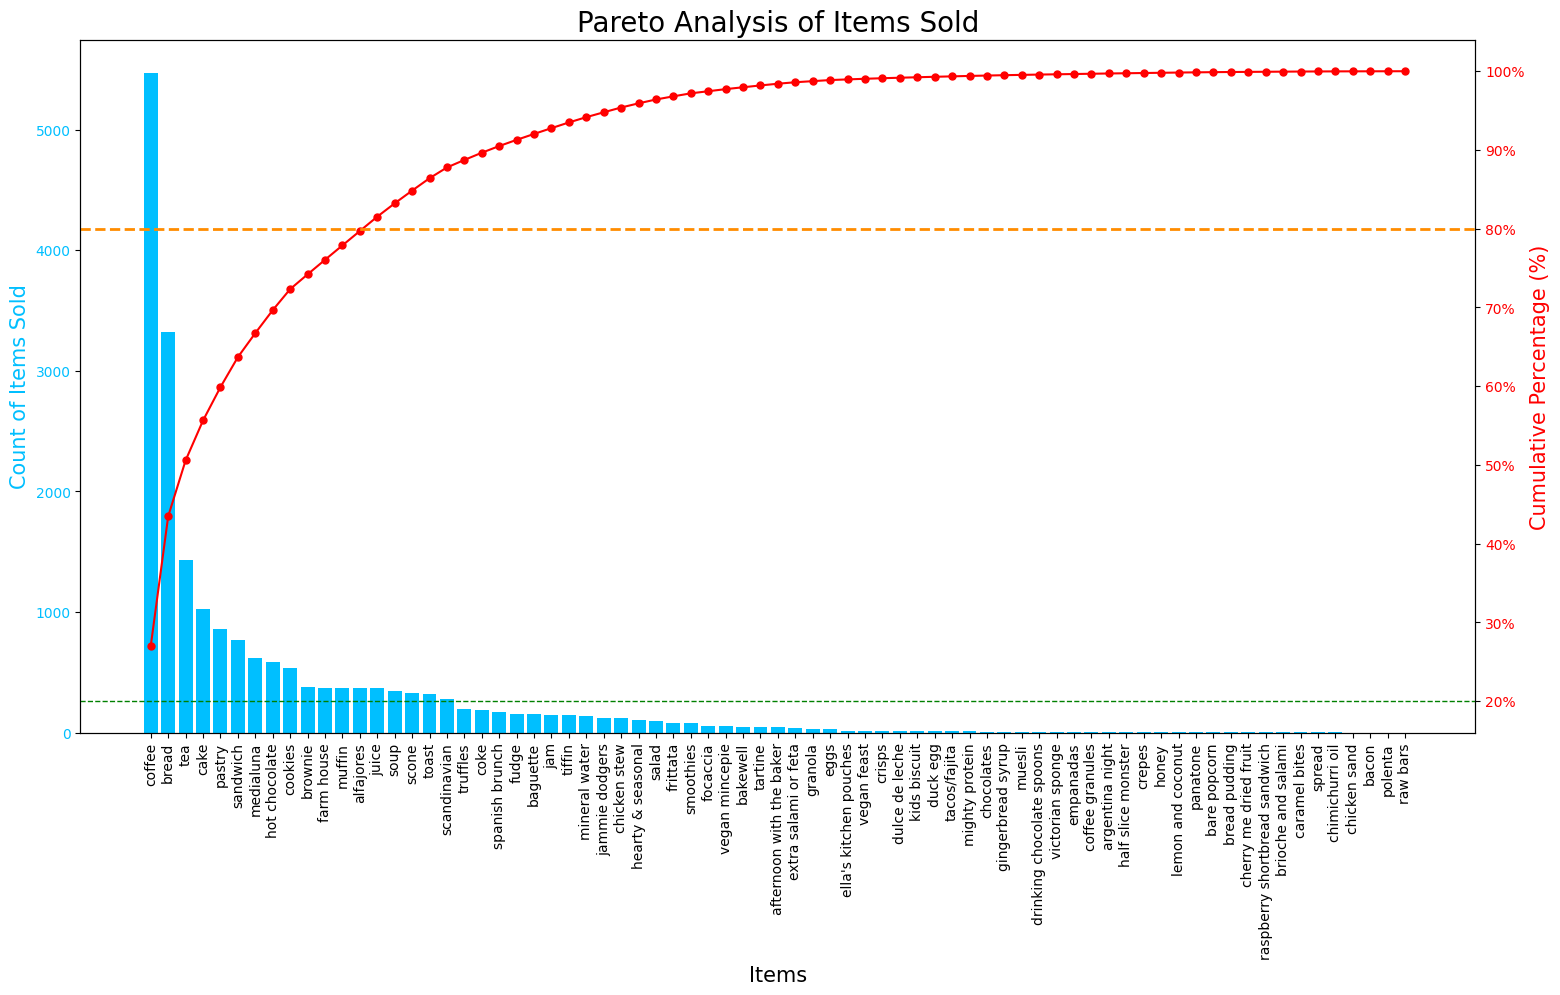

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

item_counts = df_cleaned['Items'].value_counts()
pareto_df = pd.DataFrame({'item': item_counts.index, 'count': item_counts.values})
pareto_df['cumulative_percentage'] = (pareto_df['count'].cumsum() / pareto_df['count'].sum()) * 100

print("--- Pareto Analysis (80/20 Rule) ---")
print("Top 20 items and their cumulative contribution:")
print(pareto_df.head(20))

fig, ax1 = plt.subplots(figsize=(18, 9))

ax1.bar(pareto_df['item'], pareto_df['count'], color='deepskyblue')
ax1.set_xlabel('Items', fontsize=15)
ax1.set_ylabel('Count of Items Sold', fontsize=15, color='deepskyblue')
ax1.tick_params(axis='y', labelcolor='deepskyblue')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
ax2.plot(pareto_df['item'], pareto_df['cumulative_percentage'], color='red', marker='o', ms=5)
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=15, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(PercentFormatter())

ax2.axhline(y=80, color='darkorange', linestyle='--', linewidth=2, label='80% Threshold')
ax2.axhline(y=20, color='green', linestyle='--', linewidth=1, label='20% Threshold')

plt.title('Pareto Analysis of Items Sold', fontsize=20)
plt.grid(False)
plt.show()

--- Step 2.3: Top 20 Most Sold Items Analysis ---


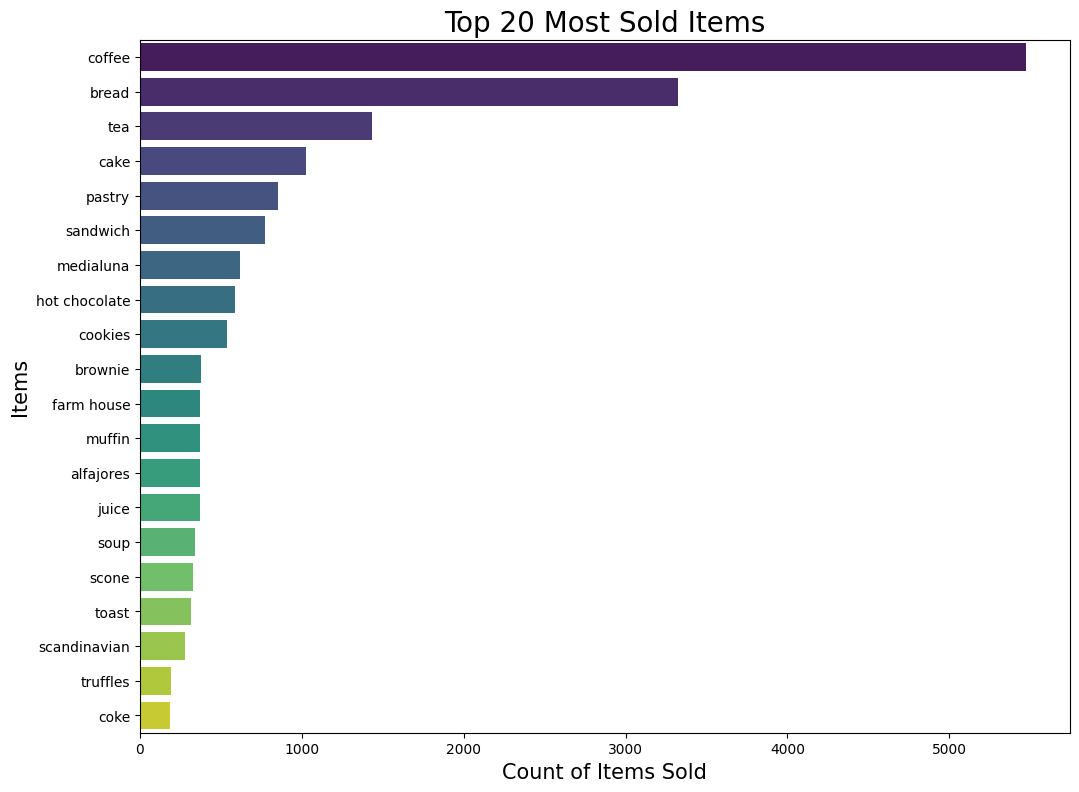


Top 20 Items List:
Items
coffee           5471
bread            3325
tea              1435
cake             1025
pastry            856
sandwich          771
medialuna         616
hot chocolate     590
cookies           540
brownie           379
farm house        374
muffin            370
alfajores         369
juice             369
soup              342
scone             327
toast             318
scandinavian      277
truffles          193
coke              185
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Step 2.3: Top 20 Most Sold Items Analysis ---")
top_20_items = df_cleaned['Items'].value_counts().head(20)

plt.figure(figsize=(12, 9))
sns.barplot(x=top_20_items.values, y=top_20_items.index, palette='viridis', orient='h')
plt.title('Top 20 Most Sold Items', fontsize=20)
plt.xlabel('Count of Items Sold', fontsize=15)
plt.ylabel('Items', fontsize=15)
plt.show()

print("\nTop 20 Items List:")
print(top_20_items)

--- Step 2.4: Identifying and Analyzing VIP Customers ---
A transaction is considered 'VIP' if it contains 4 or more unique items.
Number of identified VIP transactions: 928

--- Top 10 Items Purchased by VIP Customers ---
Items
coffee           854
bread            455
tea              344
cake             293
sandwich         243
hot chocolate    191
juice            183
cookies          167
pastry           149
medialuna        148
Name: count, dtype: int64

Generating the bar chart for VIP customer preferences...


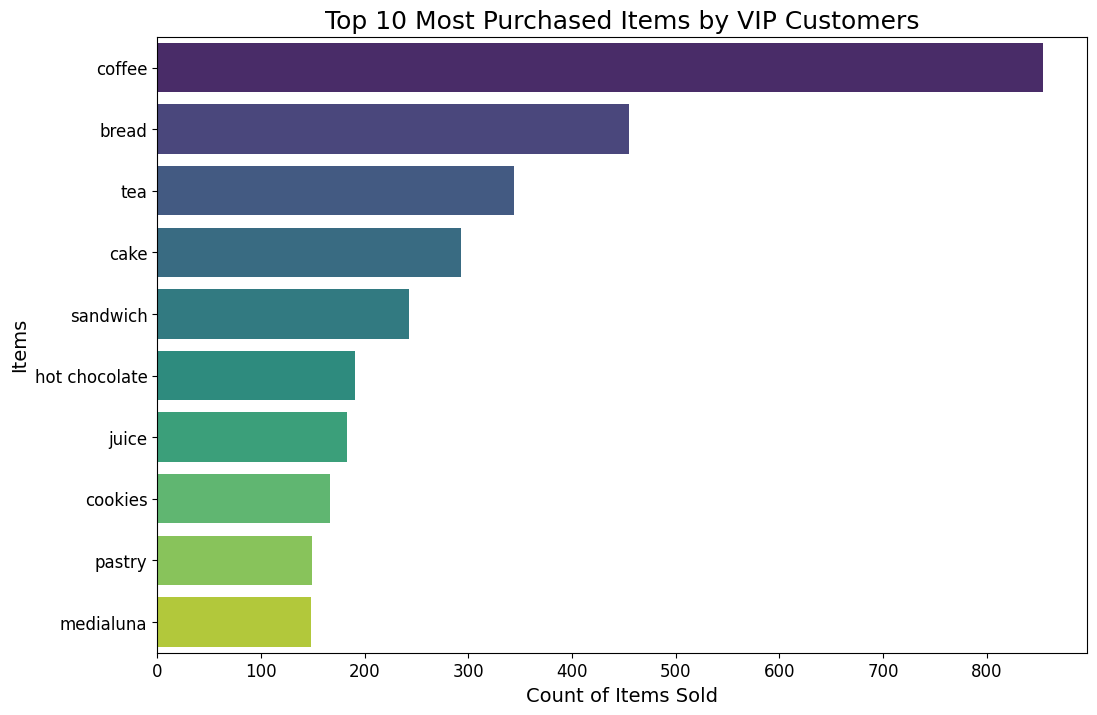

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Step 2.4: Identifying and Analyzing VIP Customers ---")
items_per_transaction = df_cleaned.groupby('Transaction')['Items'].nunique()
vip_threshold = items_per_transaction.quantile(0.95)
vip_transactions_ids = items_per_transaction[items_per_transaction >= vip_threshold].index

print(f"A transaction is considered 'VIP' if it contains {int(vip_threshold)} or more unique items.")
print(f"Number of identified VIP transactions: {len(vip_transactions_ids)}")


vip_items_df = df_cleaned[df_cleaned['Transaction'].isin(vip_transactions_ids)]
vip_item_counts = vip_items_df['Items'].value_counts().head(10)

print("\n--- Top 10 Items Purchased by VIP Customers ---")
print(vip_item_counts)
print("\nGenerating the bar chart for VIP customer preferences...")
plt.figure(figsize=(12, 8))
sns.barplot(x=vip_item_counts.values, y=vip_item_counts.index, palette='viridis', orient='h')
plt.title('Top 10 Most Purchased Items by VIP Customers', fontsize=18)
plt.xlabel('Count of Items Sold', fontsize=14)
plt.ylabel('Items', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

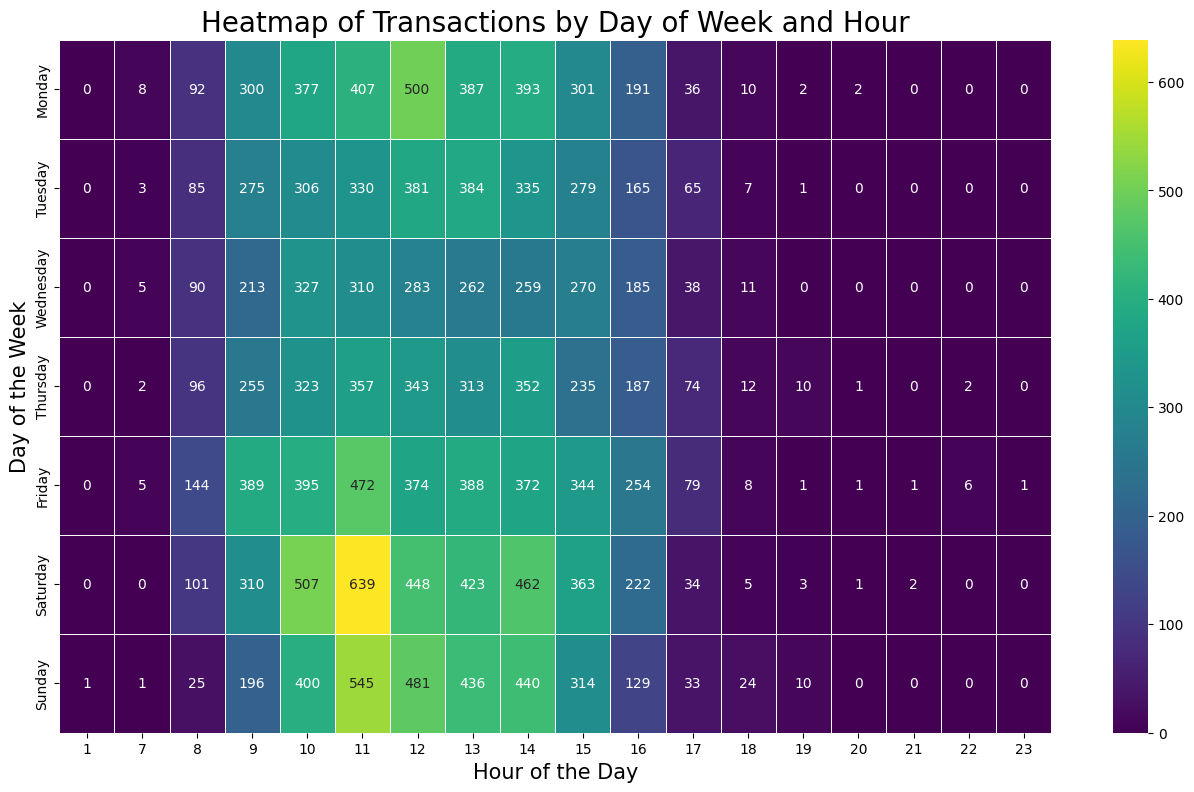

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_heatmap = df_cleaned.copy()
df_heatmap['Hour'] = df_heatmap['DateTime'].dt.hour
df_heatmap['DayOfWeek'] = df_heatmap['DateTime'].dt.day_name()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

heatmap_data = df_heatmap.groupby(['DayOfWeek', 'Hour']).size().unstack(fill_value=0)
heatmap_data = heatmap_data.reindex(day_order)

plt.figure(figsize=(16, 9))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Transactions by Day of Week and Hour', fontsize=20)
plt.xlabel('Hour of the Day', fontsize=15)
plt.ylabel('Day of the Week', fontsize=15)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

print("--- Step 3: Customer Segmentation ---")

# 3.1 & 3.2: Simulate Customer IDs and Feature Engineering
customer_df = df_cleaned.groupby('Transaction').agg(
    Hour=('DateTime', lambda x: x.iloc[0].hour),
    DayOfWeek=('DateTime', lambda x: x.iloc[0].weekday()),
    IsWeekend=('DayType', lambda x: 1 if x.iloc[0] == 'Weekend' else 0),
    NumItems=('Items', 'count')
).reset_index()

print("Engineered features for each transaction:")
print(customer_df.head())
features = ['Hour', 'DayOfWeek', 'IsWeekend', 'NumItems']
X = customer_df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\nSegmentation results (first 5 transactions with their cluster):")
print(customer_df.head())
print("\n--- Analysis of Customer Segments ---")
cluster_analysis = customer_df.groupby('Cluster')[features].mean()
print(cluster_analysis)


--- Step 3: Customer Segmentation ---
Engineered features for each transaction:
   Transaction  Hour  DayOfWeek  IsWeekend  NumItems
0            1     9          6          1         1
1            2    10          6          1         2
2            3    10          6          1         3
3            4    10          6          1         1
4            5    10          6          1         3

Segmentation results (first 5 transactions with their cluster):
   Transaction  Hour  DayOfWeek  IsWeekend  NumItems  Cluster
0            1     9          6          1         1        2
1            2    10          6          1         2        2
2            3    10          6          1         3        2
3            4    10          6          1         1        2
4            5    10          6          1         3        2

--- Analysis of Customer Segments ---
              Hour  DayOfWeek  IsWeekend  NumItems
Cluster                                           
0        12.731302   2.8

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

print("--- Step 4.1: Applying Apriori Algorithm ---")

basket = (df_cleaned.groupby(['Transaction', 'Items'])['Items']
          .count().unstack().reset_index().fillna(0)
          .set_index('Transaction'))

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])
print("Top 10 Strongest Association Rules Found:")
print(rules.head(10))


--- Step 4.1: Applying Apriori Algorithm ---
Top 10 Strongest Association Rules Found:
         antecedents consequents  antecedent support  consequent support  \
30           (toast)    (coffee)            0.033790            0.481139   
28  (spanish brunch)    (coffee)            0.018276            0.481139   
18       (medialuna)    (coffee)            0.062161            0.481139   
22          (pastry)    (coffee)            0.086601            0.481139   
0        (alfajores)    (coffee)            0.036553            0.481139   
16           (juice)    (coffee)            0.038784            0.481139   
24        (sandwich)    (coffee)            0.072256            0.481139   
6             (cake)    (coffee)            0.104452            0.481139   
26           (scone)    (coffee)            0.034747            0.481139   
12         (cookies)    (coffee)            0.054723            0.481139   

     support  confidence      lift  representativity  leverage  conviction  

/tmp/ipykernel_36/3318718986.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



--- Step 4.2 (Corrected): Visualizing Rules as a Network Graph ---


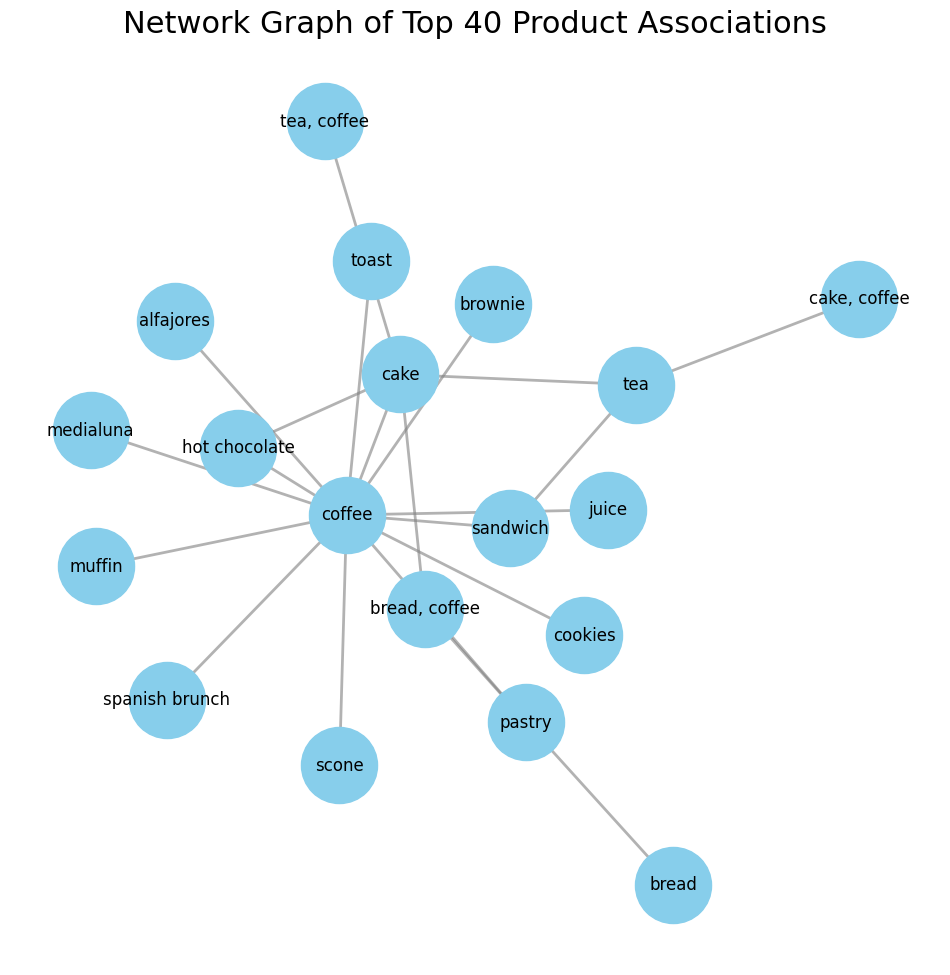

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

print("\n--- Step 4.2 : Visualizing Rules as a Network Graph ---")

rules_to_plot = rules.head(40)

G = nx.from_pandas_edgelist(rules_to_plot,
                            source='antecedents',
                            target='consequents',
                            edge_attr=['lift', 'confidence'])

mapping = {node: ', '.join(node) for node in G.nodes()}
G = nx.relabel_nodes(G, mapping)
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.8, iterations=50, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2.0, alpha=0.6, edge_color='gray')

plt.title('Network Graph of Top 40 Product Associations', fontsize=22)
plt.axis('off')
plt.show()

In [ ]:
print("--- Step 5.1: Building a Popularity-Based Recommender (Baseline) ---")

class PopularityRecommender:
    def __init__(self, top_n=5):
        self.top_n = top_n
        self.recommendations = []

    def fit(self, item_counts):
        self.recommendations = item_counts.head(self.top_n).index.tolist()

    def recommend(self, user_id=None):
        return self.recommendations
item_counts = df_cleaned['Items'].value_counts()
pop_recommender = PopularityRecommender(top_n=5)
pop_recommender.fit(item_counts)
popular_recommendations = pop_recommender.recommend()

print(f"Top 5 recommendations from the Popularity Model are: {popular_recommendations}")


--- Step 5.1: Building a Popularity-Based Recommender (Baseline) ---
Top 5 recommendations from the Popularity Model are: ['coffee', 'bread', 'tea', 'cake', 'pastry']


In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

print("\n--- Step 5.2: Building a Collaborative Filtering Recommender (SVD) ---")
ratings_df = df_cleaned.groupby(['Transaction', 'Items']).size().reset_index(name='rating')
reader = Reader(rating_scale=(ratings_df['rating'].min(), ratings_df['rating'].max()))
data = Dataset.load_from_df(ratings_df[['Transaction', 'Items', 'rating']], reader)
algo = SVD(random_state=42)
cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("\nCross-validation results for SVD model:")



--- Step 5.2: Building a Collaborative Filtering Recommender (SVD) ---
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2862  0.2957  0.3027  0.2968  0.2875  0.2938  0.0061  
MAE (testset)     0.1450  0.1466  0.1498  0.1469  0.1483  0.1473  0.0016  
Fit time          0.23    0.23    0.23    0.22    0.24    0.23    0.00    
Test time         0.02    0.02    0.02    0.02    0.02    0.02    0.00    

Cross-validation results for SVD model:


In [ ]:
print("--- Step 6: Business Scenario Simulation ---")
all_transactions = df_cleaned['Transaction'].unique()
toast_transactions = df_cleaned[df_cleaned['Items'] == 'toast']['Transaction'].unique()
coffee_transactions = df_cleaned[df_cleaned['Items'] == 'coffee']['Transaction'].unique()

target_transactions = set(toast_transactions) - set(coffee_transactions)
num_target_transactions = len(target_transactions)

print(f"Total unique transactions in the dataset: {len(all_transactions)}")
print(f"Number of transactions containing 'toast': {len(toast_transactions)}")
print(f"Number of transactions to target with the 'Toast & Coffee' offer: {num_target_transactions}")

success_rate = 0.30 
projected_coffee_increase = int(num_target_transactions * success_rate)
current_coffee_sales = df_cleaned[df_cleaned['Items'] == 'coffee'].shape[0]
new_projected_coffee_sales = current_coffee_sales + projected_coffee_increase

percentage_increase = (projected_coffee_increase / current_coffee_sales) * 100

print("\n--- Simulation Results ---")
print(f"Current total sales count for 'coffee': {current_coffee_sales}")
print(f"With a {success_rate:.0%} promotion success rate, we can expect to sell an additional {projected_coffee_increase} units of 'coffee'.")
print(f"New projected total sales for 'coffee': {new_projected_coffee_sales}")
print(f"This represents a projected increase of {percentage_increase:.2f}% in coffee sales.")


--- Step 6: Business Scenario Simulation ---
Total unique transactions in the dataset: 9411
Number of transactions containing 'toast': 318
Number of transactions to target with the 'Toast & Coffee' offer: 94

--- Simulation Results ---
Current total sales count for 'coffee': 5471
With a 30% promotion success rate, we can expect to sell an additional 28 units of 'coffee'.
New projected total sales for 'coffee': 5499
This represents a projected increase of 0.51% in coffee sales.


In [ ]:
# Assuming 'algo' (our trained SVD model) is available
trainset = data.build_full_trainset()
algo.fit(trainset)
transaction_id_to_predict = 100
item_to_predict = 'coffee'
prediction = algo.predict(str(transaction_id_to_predict), item_to_predict)

print(f"\n--- Prediction Example ---")
print(f"Predicted rating (count) for Transaction {transaction_id_to_predict} and Item '{item_to_predict}': {prediction.est:.2f}")



--- Prediction Example ---
Predicted rating (count) for Transaction 100 and Item 'coffee': 1.16


In [ ]:
def get_top_n_recommendations(predictions, n=5):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n
all_items = df_cleaned['Items'].unique()
target_transaction_id = 100
bought_items = df_cleaned[df_cleaned['Transaction'] == target_transaction_id]['Items'].unique()
predictions_for_target = []
for item in all_items:
    if item not in bought_items:
        predictions_for_target.append(algo.predict(str(target_transaction_id), item))

top_recommendations = get_top_n_recommendations(predictions_for_target, n=5)

print(f"\n--- Top 5 Recommendations for Transaction {target_transaction_id} ---")
if str(target_transaction_id) in top_recommendations:
    for item, score in top_recommendations[str(target_transaction_id)]:
        print(f"- {item} (Predicted Score: {score:.2f})")
else:
    print("No recommendations could be generated for this transaction.")


--- Top 5 Recommendations for Transaction 100 ---
- sandwich (Predicted Score: 1.16)
- coffee (Predicted Score: 1.16)
- fudge (Predicted Score: 1.14)
- chocolates (Predicted Score: 1.10)
- chicken sand (Predicted Score: 1.08)
